<a href="https://colab.research.google.com/github/jgerdes2021/Gerdes_Probability_Statistics-Fall-2022/blob/main/Gerdes_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [1]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [2]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
#defining and loading the data 

In [4]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [5]:
url = "https://docs.google.com/presentation/d/1lYhS_J0tHdlCXRQYjvlfjtulJrGRYBoUm0iwu7wdSKo/edit#slide=id.g1af92d8fbd6_0_0"

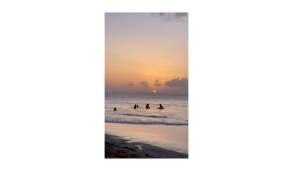

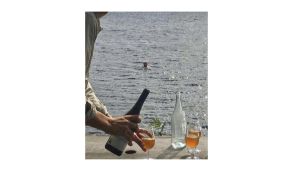

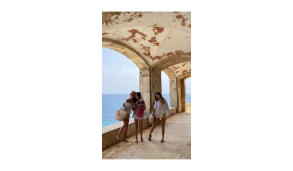

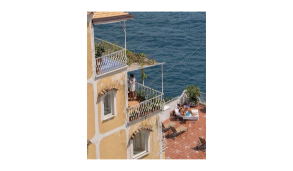

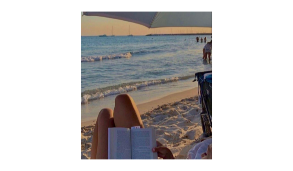

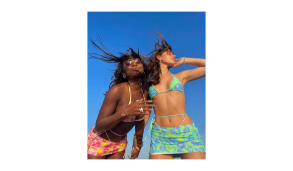

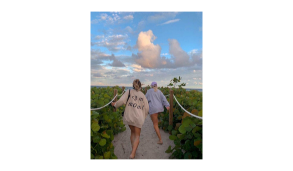

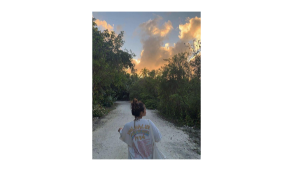

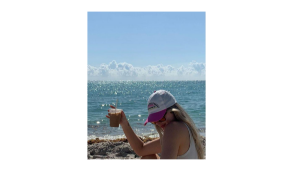

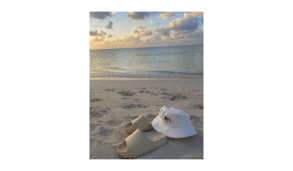

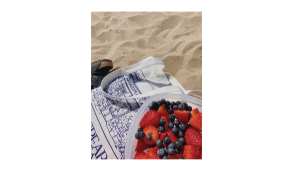

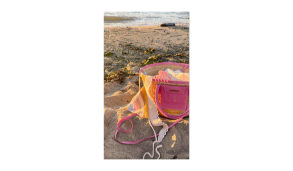

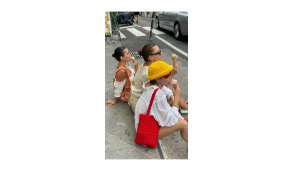

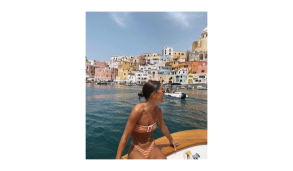

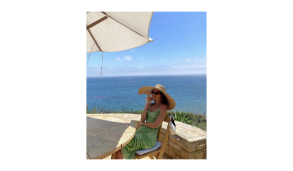

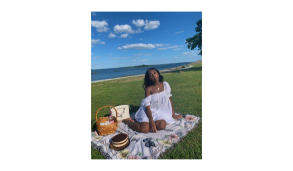

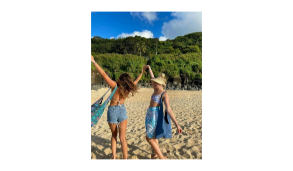

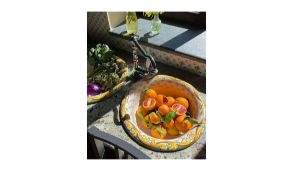

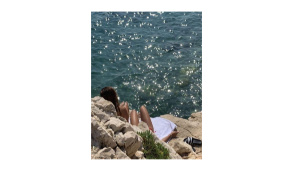

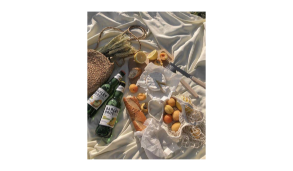

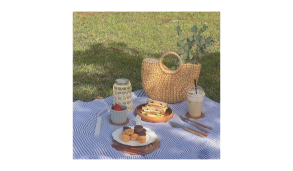

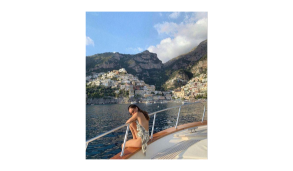

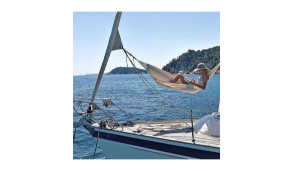

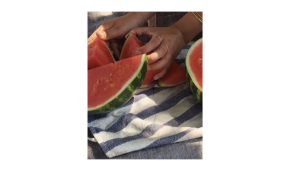

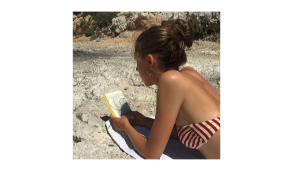

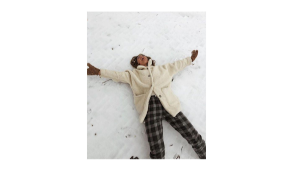

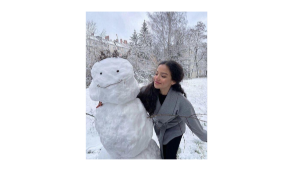

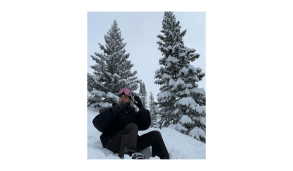

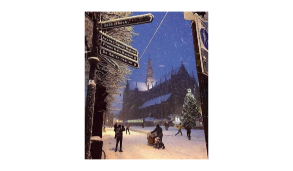

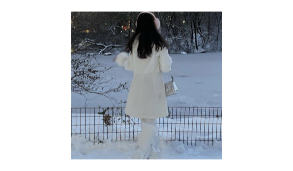

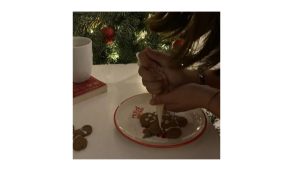

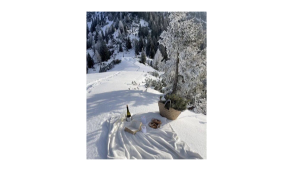

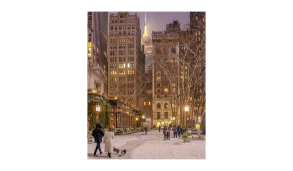

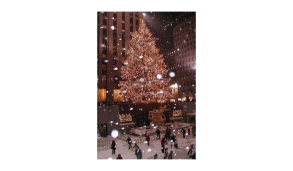

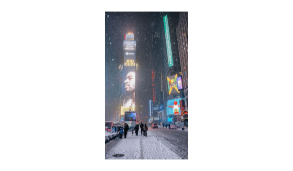

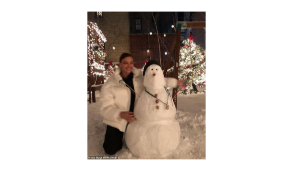

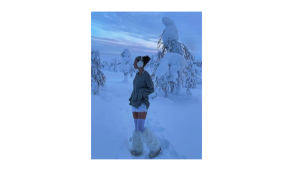

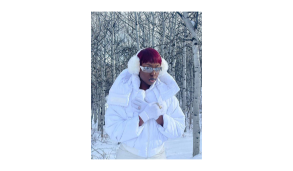

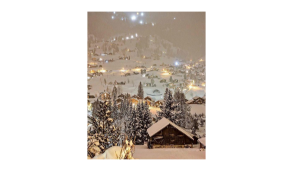

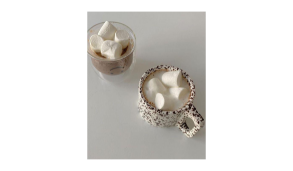

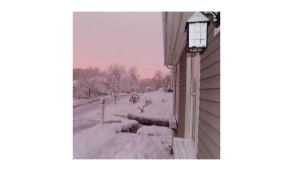

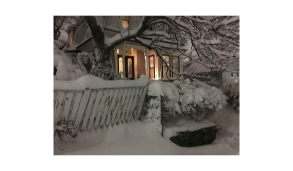

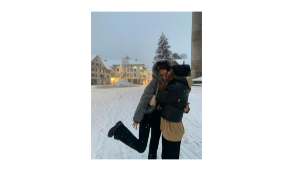

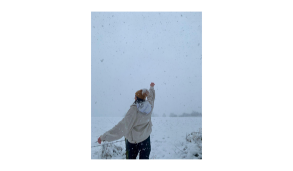

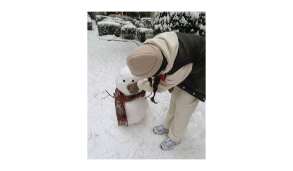

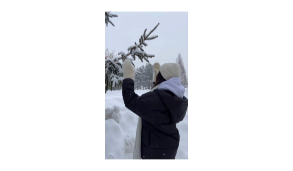

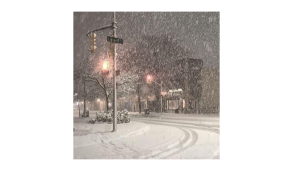

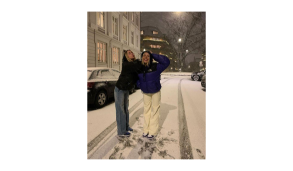

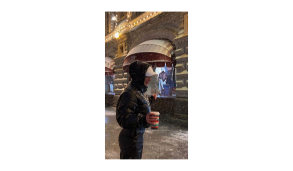

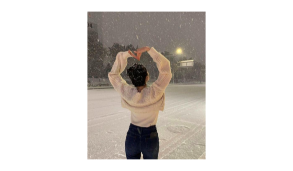

In [6]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [7]:
#inmages 

In [8]:
images.shape

torch.Size([50, 3, 224, 224])

In [9]:
model(images)

tensor([[-1.2291, -1.8638, -2.8025,  ..., -5.7997, -1.6569,  1.7649],
        [ 1.8061, -2.6856,  2.9228,  ..., -3.6656, -1.1308,  1.1231],
        [-3.7591, -4.7580, -3.0987,  ..., -0.0156, -1.6291, -1.8164],
        ...,
        [-1.3811, -4.6927, -2.3058,  ..., -5.1644,  0.9078,  2.1708],
        [-1.1335, -2.9957, -1.4878,  ..., -1.9983,  0.0424, -1.3002],
        [-1.8583, -2.6588, -0.8431,  ..., -0.6139, -0.6298,  6.1212]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [10]:
y = model(images)

In [11]:
#equation for y

In [12]:
y.shape

torch.Size([50, 1000])

In [13]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [14]:
for i in list(guesses):
    print(labels[i])

beacon, lighthouse, beacon light, pharos
gondola
guillotine
guillotine
plane, carpenter's plane, woodworking plane
maillot, tank suit
web site, website, internet site, site
geyser
maillot, tank suit
Arctic fox, white fox, Alopex lagopus
packet
packet
dishwasher, dish washer, dishwashing machine
maillot, tank suit
umbrella
television, television system
sarong
acorn squash
lakeside, lakeshore
hamper
pot, flowerpot
seashore, coast, seacoast, sea-coast
yawl
plane, carpenter's plane, woodworking plane
bikini, two-piece
lab coat, laboratory coat
lab coat, laboratory coat
giant schnauzer
bell cote, bell cot
dishwasher, dish washer, dishwashing machine
vase
dogsled, dog sled, dog sleigh
triumphal arch
rotisserie
modem
groom, bridegroom
book jacket, dust cover, dust jacket, dust wrapper
ski mask
honeycomb
dial telephone, dial phone
guillotine
quilt, comforter, comfort, puff
jean, blue jean, denim
lab coat, laboratory coat
pug, pug-dog
academic gown, academic robe, judge's robe
fire screen, fire

In [15]:
#labels for the images

In [16]:
Y = np.zeros(50,)
Y[25:] = 1

In [17]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [18]:
#array for y

In [19]:
X = y.detach().cpu().numpy() 

In [20]:
#equation for x

In [21]:
X.shape

(50, 1000)

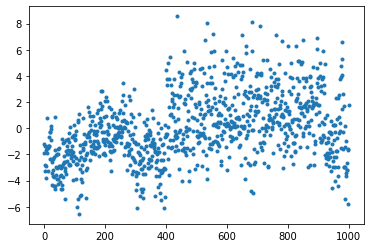

In [23]:
plt.plot(X[0],'.')

In [24]:
X[0]

array([-1.22906327e+00, -1.86378312e+00, -2.80254126e+00, -3.22933912e+00,
       -1.33347690e+00, -3.76777720e+00, -2.87873244e+00, -1.65355253e+00,
       -1.87633514e+00,  7.88475156e-01, -1.47602904e+00, -1.54001641e+00,
       -1.39825869e+00, -1.36098790e+00, -3.25215292e+00, -6.79650426e-01,
       -1.38211954e+00, -1.34993625e+00, -2.62897134e-01, -2.86981672e-01,
       -2.38390207e+00,  1.59239858e-01, -4.56404090e-02, -9.20382440e-01,
       -2.33771634e+00, -4.30939054e+00, -3.41997051e+00, -2.56577873e+00,
       -3.61268115e+00, -2.36332560e+00, -3.20574212e+00, -2.22037959e+00,
       -4.41856289e+00, -3.72676349e+00, -1.66233623e+00, -4.41560364e+00,
        8.37481856e-01, -4.67243099e+00, -3.58465505e+00, -2.07673311e+00,
       -2.95088243e+00, -3.90223861e+00, -3.05550122e+00, -1.95507097e+00,
       -1.96388268e+00, -4.22136307e+00, -1.57722497e+00, -3.84108448e+00,
       -2.88109756e+00, -2.98606586e+00, -1.46999526e+00, -2.88705969e+00,
       -4.06758022e+00, -

In [25]:
np.argmax(X[0])

437

In [26]:
labels[948]

'Granny Smith'

In [27]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [28]:
for i in top_ten:
    print(labels[i])

beacon, lighthouse, beacon light, pharos
obelisk
dishwasher, dish washer, dishwashing machine
pedestal, plinth, footstall
file, file cabinet, filing cabinet
refrigerator, icebox
medicine chest, medicine cabinet
washer, automatic washer, washing machine
desktop computer
television, television system


In [29]:
#top ten labels for the images

In [30]:
labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

In [31]:
#labels 

(array([ 16.,  46., 148., 254., 223., 146.,  93.,  51.,  16.,   7.]),
 array([-6.542977 , -5.0325403, -3.5221035, -2.0116668, -0.5012301,
         1.0092065,  2.5196433,  4.03008  ,  5.5405164,  7.0509534,
         8.56139  ], dtype=float32),
 <a list of 10 Patch objects>)

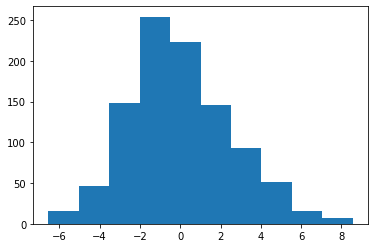

In [32]:
plt.hist(X[0])

In [33]:
#plt.hist creates a histogram

In [34]:
X = GPU_data(X)
Y = GPU_data(Y)

In [35]:
#equation for x and y

In [36]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [37]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [38]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [39]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [40]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [41]:
X.shape

torch.Size([50, 1000])

In [42]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [43]:
#defining the batch of data 

In [44]:
def model(x,w):

    return x@w[0]

In [45]:
#defining the model

In [46]:
def make_plots():
     
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [47]:
#defining the model

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

https://tensorspace.org/